Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [ ]:
!pip install pymystem3

In [ ]:
import re

In [ ]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [ ]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [ ]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [ ]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

In [ ]:
mystem.analyze('стали')

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

In [ ]:
mystem.analyze('кринжевать')

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

In [ ]:
mystem.analyze('сплав стали')

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [ ]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

FileNotFoundError: [Errno 2] No such file or directory: 'text_morph.txt'

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

NameError: name 'txt' is not defined

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

NameError: name 'resulting_text' is not defined

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [7]:
!pip install -q pymystem3 nltk

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Длина английского текста: 4215 символов
Длина русского текста: 4588 символов
АНГЛИЙСКИЙ ТЕКСТ
Способ 1: 772 простых токенов

Топ-10 простых токенов:
,: 49
the: 30
of: 25
and: 21
.: 18
as: 17
is: 15
in: 13
a: 13
that: 13

Способ 2: 772 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
,_.: 49
the_DET: 30
of_ADP: 25
and_CONJ: 21
._.: 18
is_VERB: 15
as_ADP: 15
in_ADP: 13
a_DET: 13
(_.: 13

Способ 3: 505 токенов без стоп-слов

Топ-10 токенов без стоп-слов:
,: 49
.: 18
(: 13
): 12
&: 10
“: 9
”: 9
aging: 7
elderly: 7
2004: 7
РУССКИЙ ТЕКСТ
Способ 1: 768 простых токенов

Топ-10 простых токенов:
, : 53
в: 40
. : 36
 «: 22
и: 20
жаргон: 12
сленг: 10
» : 8
с: 8
.: 8

Способ 2: 574 токенов с POS-тегами

Топ-10 токенов с POS-тегами:
в_PR: 32
и_CONJ: 19
жаргон_S: 12
сленг_S: 10
в_S: 8
языка_S: 7
язык_S: 7
понятие_S: 7
арго_S: 6
с_PR: 6

Способ 3: 769 лемматизированных токенов

Топ-10 лемм:
,: 64
в: 31
.: 30
«: 28
»: 28
и: 19
язык: 19
жаргон: 17
сленг: 11
который: 11


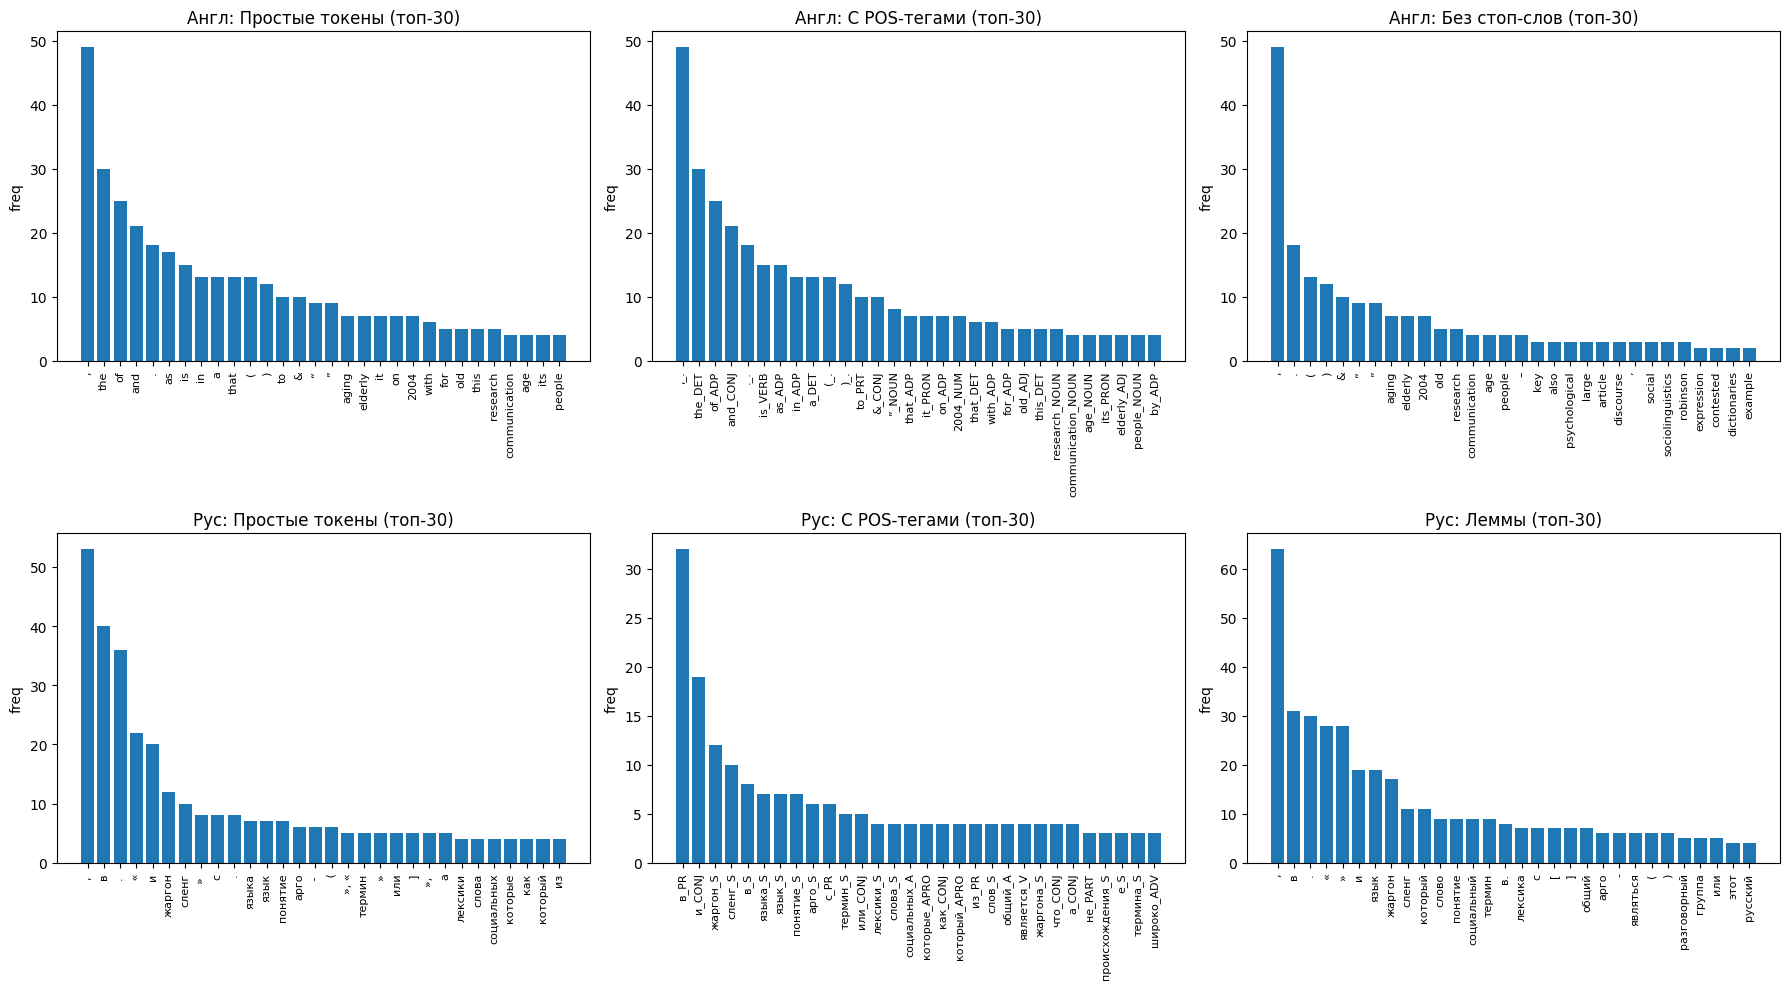

СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ

АНГЛИЙСКИЙ ТЕКСТ:
Уникальных простые токены: 15
Уникальных с POS-тегами: 30
Уникальных без стоп-слов: 15
Общих для всех трех способов: 0

РУССКИЙ ТЕКСТ:
Уникальных простые токены: 16
Уникальных с POS-тегами: 30
Уникальных леммы: 16
Общих для всех трех способов: 0


In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pymystem3 import Mystem

nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("stopwords")
nltk.download("universal_tagset")

mystem = Mystem()

with open('англ текст.txt', 'r', encoding='utf-8') as f:
    text_eng = f.read()

with open('русский текст.txt', 'r', encoding='utf-8') as f:
    text_rus = f.read()

print(f"Длина английского текста: {len(text_eng)} символов")
print(f"Длина русского текста: {len(text_rus)} символов")

def process_mystem_analysis(analysis_results):
    result_tokens = []
    for item in analysis_results:
        if item.get("text", "").strip() == "" or "analysis" not in item:
            continue

        token_text = item["text"].lower()

        if item.get("analysis"):
            first_analysis = item["analysis"][0]
            gr = first_analysis.get("gr")
            if gr:
                pos_tag = gr.split(",")[0].split("=")[0]
                result_tokens.append(f"{token_text}_{pos_tag}")
            else:
                result_tokens.append(token_text)
        else:
            result_tokens.append(token_text)

    return result_tokens


def plot_freqdist(ax, fdist, n=30, title=""):

    pairs = fdist.most_common(n)
    words = [w for w, _ in pairs]
    freqs = [f for _, f in pairs]

    ax.bar(range(len(words)), freqs)
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=90, fontsize=8)
    ax.set_title(title)
    ax.set_ylabel("freq")


def compare_top_words(freq_dist1, freq_dist2, freq_dist3, label1, label2, label3, lang):
    top1 = set([word for word, _ in freq_dist1.most_common(30)])
    top2 = set([word for word, _ in freq_dist2.most_common(30)])
    top3 = set([word for word, _ in freq_dist3.most_common(30)])

    print(f"\n{lang.upper()} ТЕКСТ:")
    print(f"Уникальных {label1}: {len(top1 - top2 - top3)}")
    print(f"Уникальных {label2}: {len(top2 - top1 - top3)}")
    print(f"Уникальных {label3}: {len(top3 - top1 - top2)}")
    print(f"Общих для всех трех способов: {len(top1 & top2 & top3)}")

    common_words = top1 & top2 & top3
    if common_words:
        print(f"\nСлова, общие для всех способов: {', '.join(sorted(list(common_words))[:10])}...")


print("АНГЛИЙСКИЙ ТЕКСТ")

tokenized_eng = word_tokenize(text_eng.lower())
print(f"Способ 1: {len(tokenized_eng)} простых токенов")

freq_dist_eng1 = FreqDist(tokenized_eng)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_eng1.most_common(10):
    print(f"{word}: {freq}")

tagged_eng = nltk.pos_tag(tokenized_eng, tagset="universal")
tagged_list_eng = ["_".join(pair) for pair in tagged_eng]

print(f"\nСпособ 2: {len(tagged_list_eng)} токенов с POS-тегами")

freq_dist_eng2 = FreqDist(tagged_list_eng)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_eng2.most_common(10):
    print(f"{word}: {freq}")

stop_words_eng = set(stopwords.words("english"))
filtered_list_eng = [w for w in tokenized_eng if w.casefold() not in stop_words_eng]

print(f"\nСпособ 3: {len(filtered_list_eng)} токенов без стоп-слов")

freq_dist_eng3 = FreqDist(filtered_list_eng)
print("\nТоп-10 токенов без стоп-слов:")
for word, freq in freq_dist_eng3.most_common(10):
    print(f"{word}: {freq}")


print("РУССКИЙ ТЕКСТ")

text_analyzed_rus = mystem.analyze(text_rus)

simple_tokens_rus = []
for item in text_analyzed_rus:
    if item.get("text", "").strip() != "":
        simple_tokens_rus.append(item["text"].lower())

print(f"Способ 1: {len(simple_tokens_rus)} простых токенов")

freq_dist_rus_1 = FreqDist(simple_tokens_rus)
print("\nТоп-10 простых токенов:")
for word, freq in freq_dist_rus_1.most_common(10):
    print(f"{word}: {freq}")

tagged_tokens_rus = process_mystem_analysis(text_analyzed_rus)
print(f"\nСпособ 2: {len(tagged_tokens_rus)} токенов с POS-тегами")

freq_dist_rus_2 = FreqDist(tagged_tokens_rus)
print("\nТоп-10 токенов с POS-тегами:")
for word, freq in freq_dist_rus_2.most_common(10):
    print(f"{word}: {freq}")

text_lemmatized_rus = mystem.lemmatize(text_rus)
new_text_lemmatized = "".join(text_lemmatized_rus)

lemmatized_tokens = word_tokenize(new_text_lemmatized.lower())
print(f"\nСпособ 3: {len(lemmatized_tokens)} лемматизированных токенов")

freq_dist_rus_3 = FreqDist(lemmatized_tokens)
print("\nТоп-10 лемм:")
for word, freq in freq_dist_rus_3.most_common(10):
    print(f"{word}: {freq}")


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plot_freqdist(axes[0, 0], freq_dist_eng1, 30, "Англ: Простые токены (топ-30)")
plot_freqdist(axes[0, 1], freq_dist_eng2, 30, "Англ: С POS-тегами (топ-30)")
plot_freqdist(axes[0, 2], freq_dist_eng3, 30, "Англ: Без стоп-слов (топ-30)")

plot_freqdist(axes[1, 0], freq_dist_rus_1, 30, "Рус: Простые токены (топ-30)")
plot_freqdist(axes[1, 1], freq_dist_rus_2, 30, "Рус: С POS-тегами (топ-30)")
plot_freqdist(axes[1, 2], freq_dist_rus_3, 30, "Рус: Леммы (топ-30)")

plt.tight_layout()
plt.show()

print("СРАВНЕНИЕ ТОП-30 КЛЮЧЕВЫХ СЛОВ")

compare_top_words(
    freq_dist_eng1, freq_dist_eng2, freq_dist_eng3,
    "простые токены", "с POS-тегами", "без стоп-слов", "английский"
)

compare_top_words(
    freq_dist_rus_1, freq_dist_rus_2, freq_dist_rus_3,
    "простые токены", "с POS-тегами", "леммы", "русский"
)